In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels. formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [50]:
df= pd.read_csv('ToyotaCorolla.csv')

In [8]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [9]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [11]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [15]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [19]:
df=df.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
df

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [20]:
df[df.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [25]:
toyo=df.drop_duplicates().reset_index(drop=True)
toyo.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [27]:
toyo.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

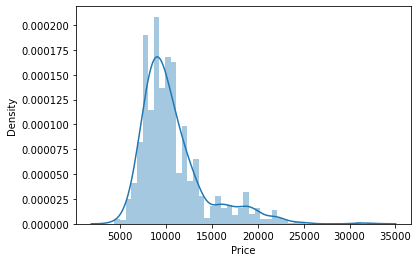

In [29]:
sns.distplot(toyo['Price'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

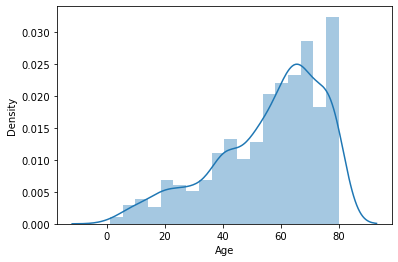

In [30]:
sns.distplot(toyo['Age'])

<AxesSubplot:xlabel='CC', ylabel='Density'>

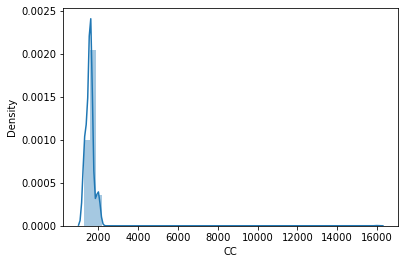

In [32]:
sns.distplot(toyo['CC'])

<AxesSubplot:xlabel='Gears', ylabel='Density'>

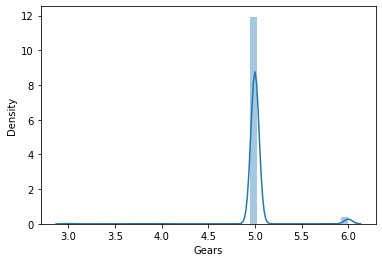

In [33]:
sns.distplot(toyo['Gears'])

<AxesSubplot:xlabel='QT', ylabel='Density'>

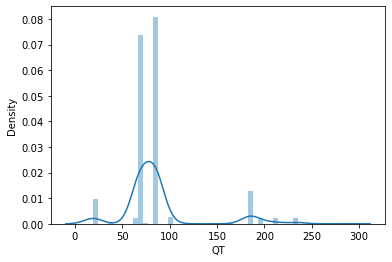

In [34]:
sns.distplot(toyo['QT'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

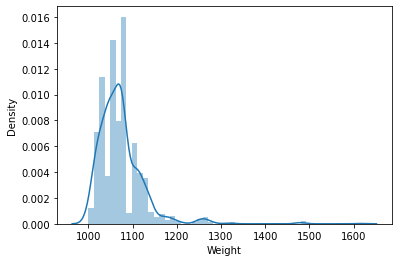

In [35]:
sns.distplot(toyo['Weight'])

<AxesSubplot:xlabel='KM', ylabel='Density'>

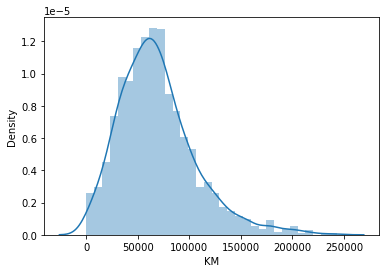

In [36]:
sns.distplot(toyo['KM'])

<AxesSubplot:xlabel='HP', ylabel='Density'>

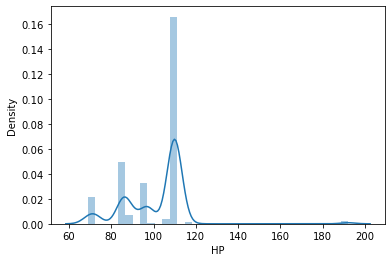

In [37]:
sns.distplot(toyo['HP'])

<AxesSubplot:xlabel='Doors', ylabel='Density'>

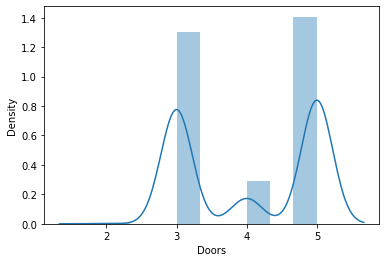

In [38]:
sns.distplot(toyo['Doors'])

<AxesSubplot:xlabel='Gears', ylabel='Density'>

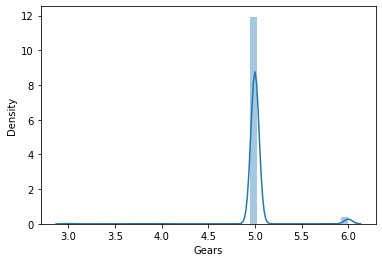

In [39]:
sns.distplot(toyo['Gears'])

In [42]:
import statsmodels.formula.api as smf
model =smf.ols('Price~Age + KM+HP+CC+Doors+Gears+QT+Weight',data=toyo).fit()


In [43]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [44]:
print(np.round(model.tvalues,5))

Intercept    -3.87527
Age         -46.55188
KM          -16.55242
HP           11.20972
CC           -1.31644
Doors        -0.02301
Gears         3.03456
QT            2.94420
Weight       15.76066
dtype: float64


In [46]:
print(np.round(model.pvalues,5))

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [47]:
slr=smf.ols('Price~Doors',data = toyo).fit()
print(round(slr.tvalues,5),'\n',round(slr.pvalues,5))

Intercept    19.42155
Doors         7.07052
dtype: float64 
 Intercept    0.0
Doors        0.0
dtype: float64


In [48]:
slr=smf.ols('Price~CC',data =toyo).fit()
print(round(slr.tvalues,5),'\n',round(slr.pvalues,5))

Intercept    24.87959
CC            4.74504
dtype: float64 
 Intercept    0.0
CC           0.0
dtype: float64


In [52]:
ml_dc = smf.ols('Price~Doors+CC',data=toyo).fit()
(round(ml_dc.tvalues,5),'\n',round(ml_dc.pvalues,5)) 

(Intercept    12.78634
 Doors         6.75224
 CC            4.26801
 dtype: float64,
 '\n',
 Intercept    0.00000
 Doors        0.00000
 CC           0.00002
 dtype: float64)

In [53]:
ml_dc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.55e-15
Time:                        10:52:35   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
CC             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight', data=toyo).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight', data=toyo).fit().rsquared
vif_KM=1/1-(rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,Age,1.876236
1,KM,0.569094
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [56]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

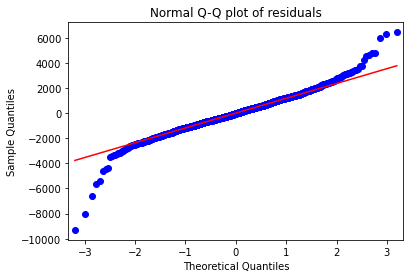

In [57]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [58]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [59]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [60]:
toyo['Predicted']= model.fittedvalues  
toyo['Error']= model.resid             
toyo

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


<AxesSubplot:xlabel='Error'>

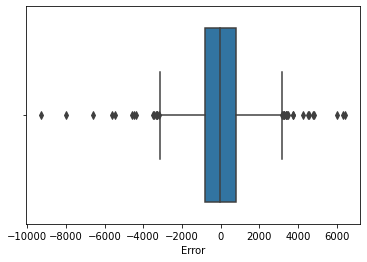

In [62]:
sns.boxplot(toyo['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

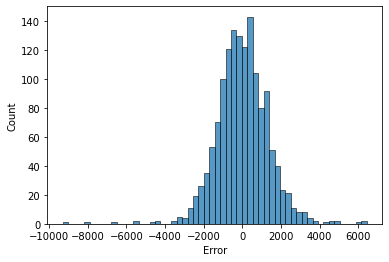

In [63]:
sns.histplot(toyo['Error'])

In [65]:
def standard_values(vals): 
    return(vals-vals.mean())/vals.std()

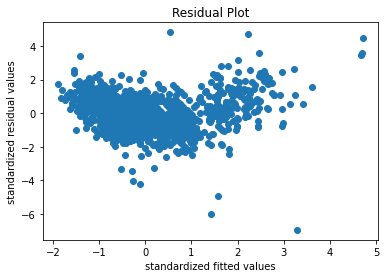

In [66]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

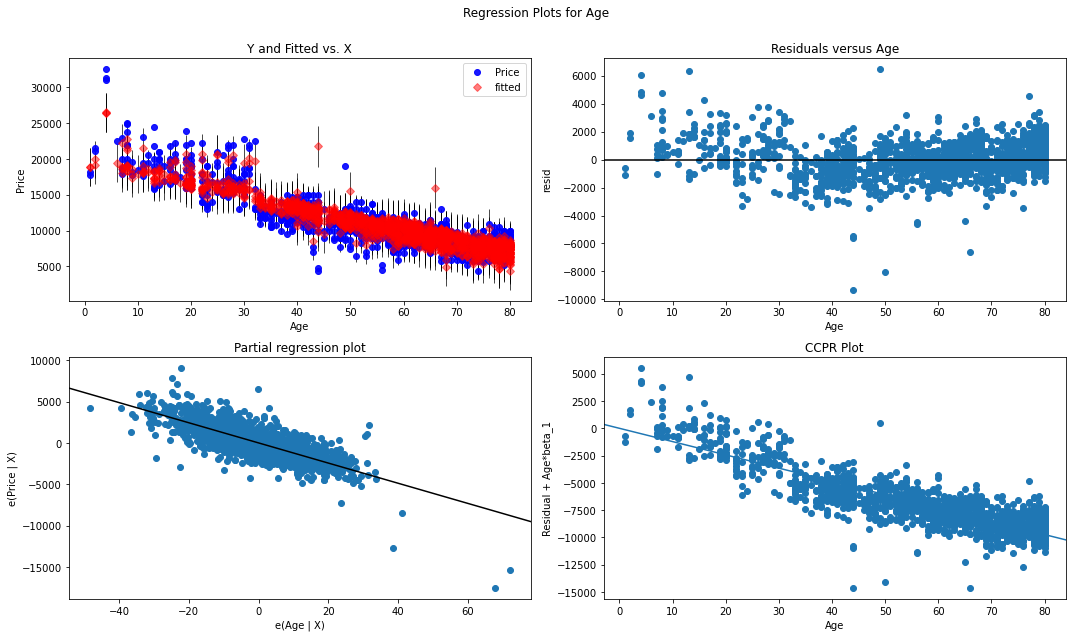

In [67]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

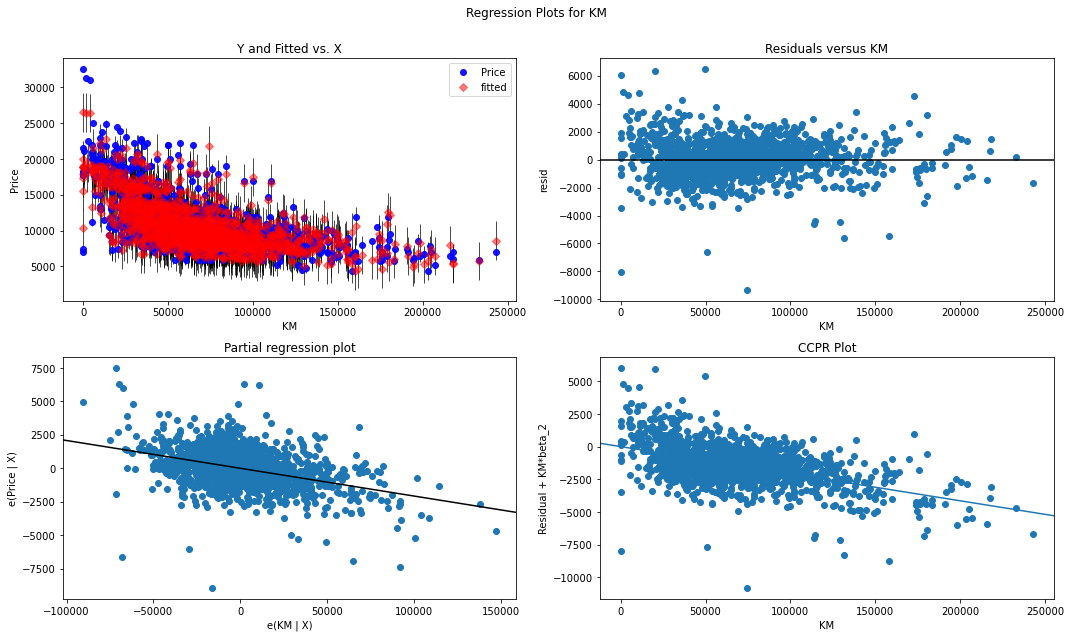

In [68]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

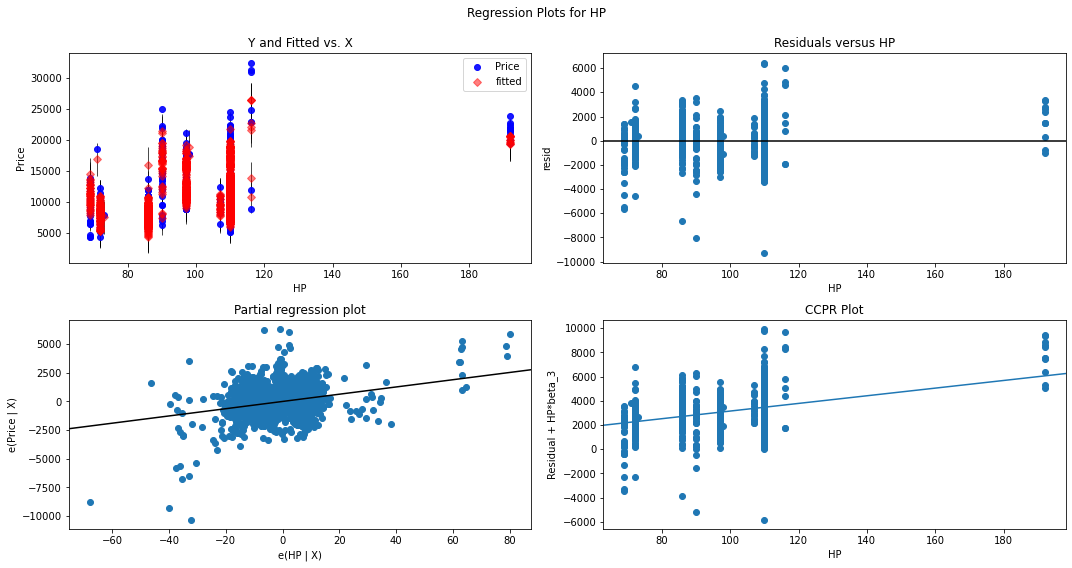

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

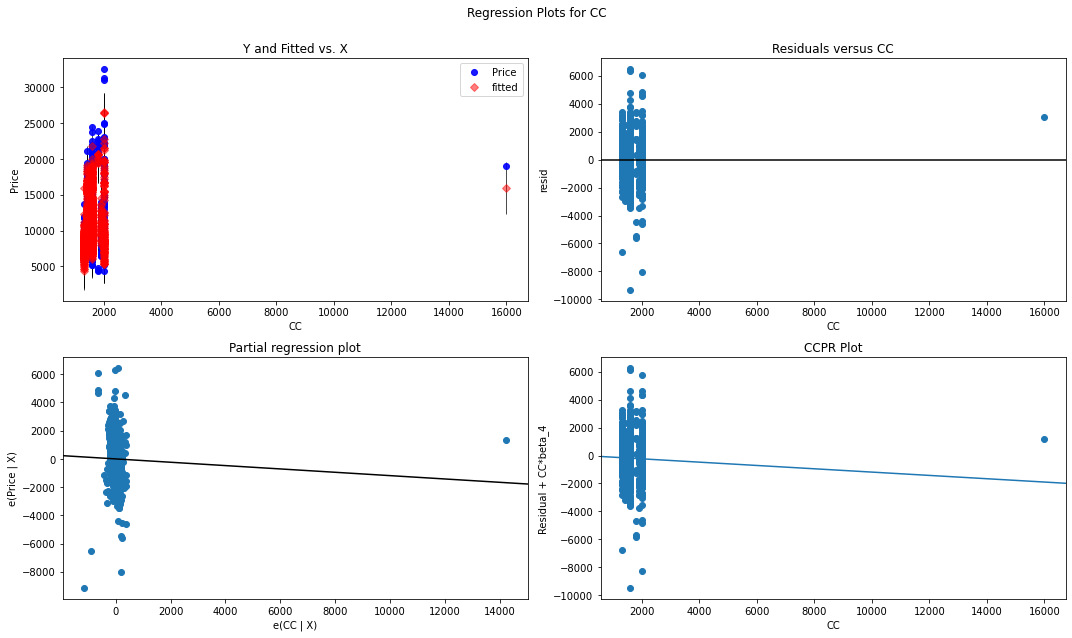

In [70]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

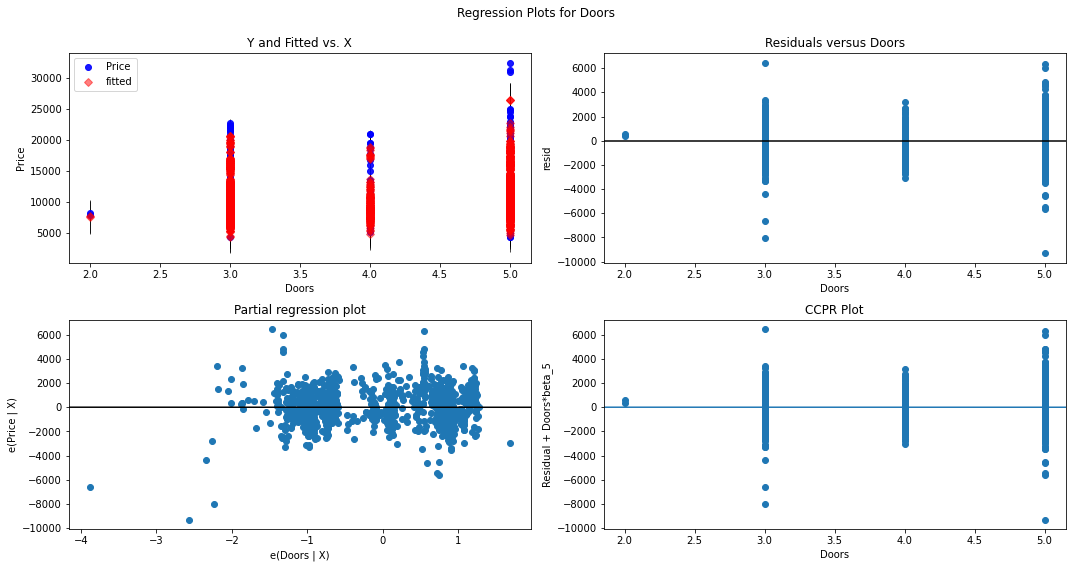

In [71]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

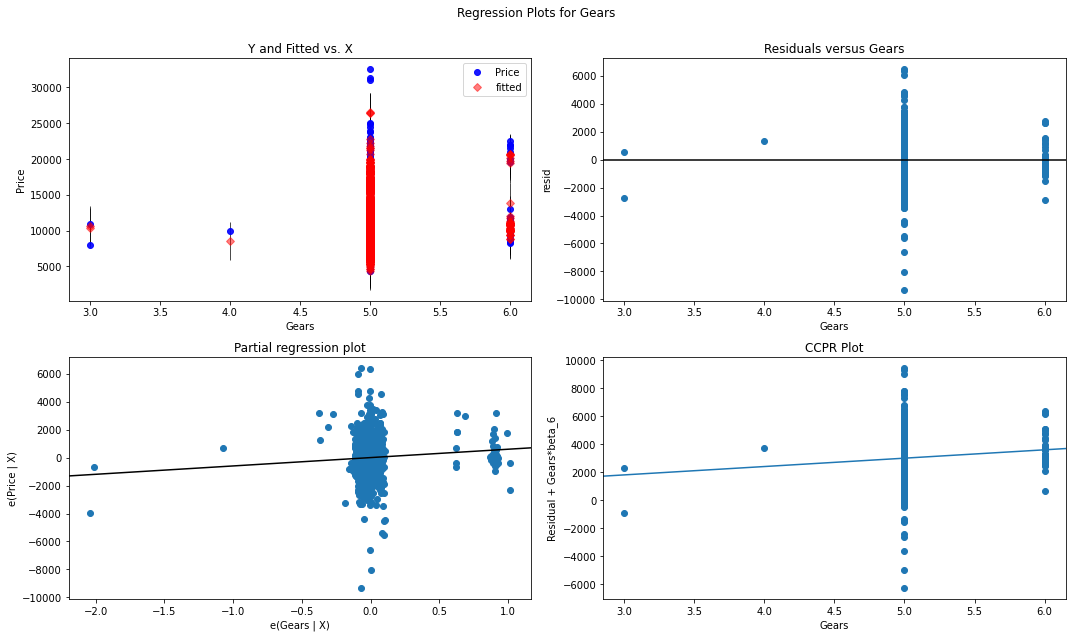

In [72]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

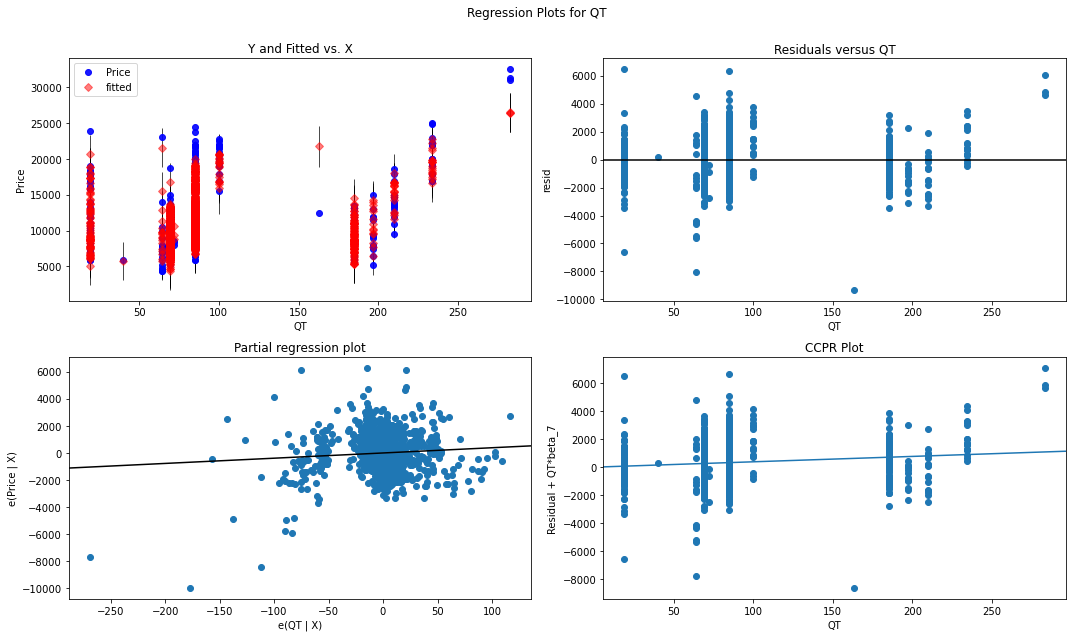

In [73]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

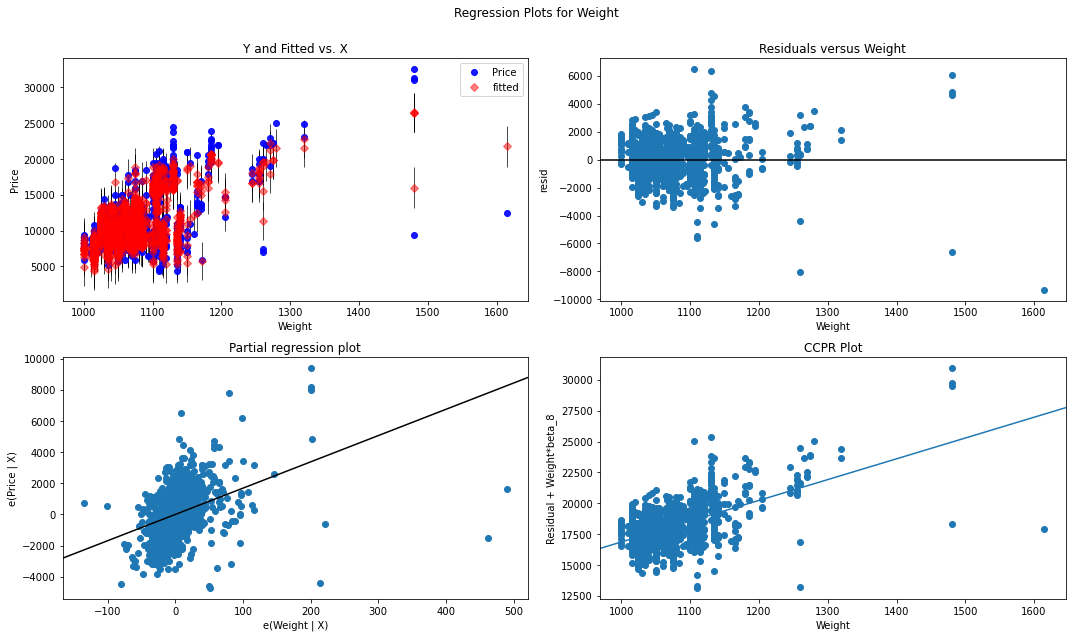

In [74]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

In [75]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

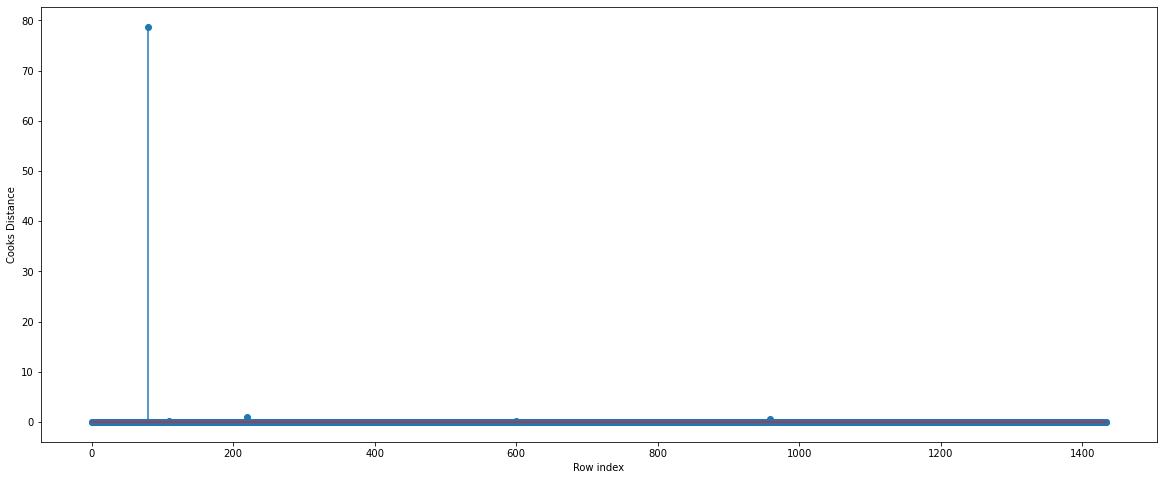

In [78]:
fig = plt.subplots(figsize=(20, 8))
plt.stem(np.arange(len(toyo)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
(np.argmax(c),np.max(c))

(80, 78.7295058224851)

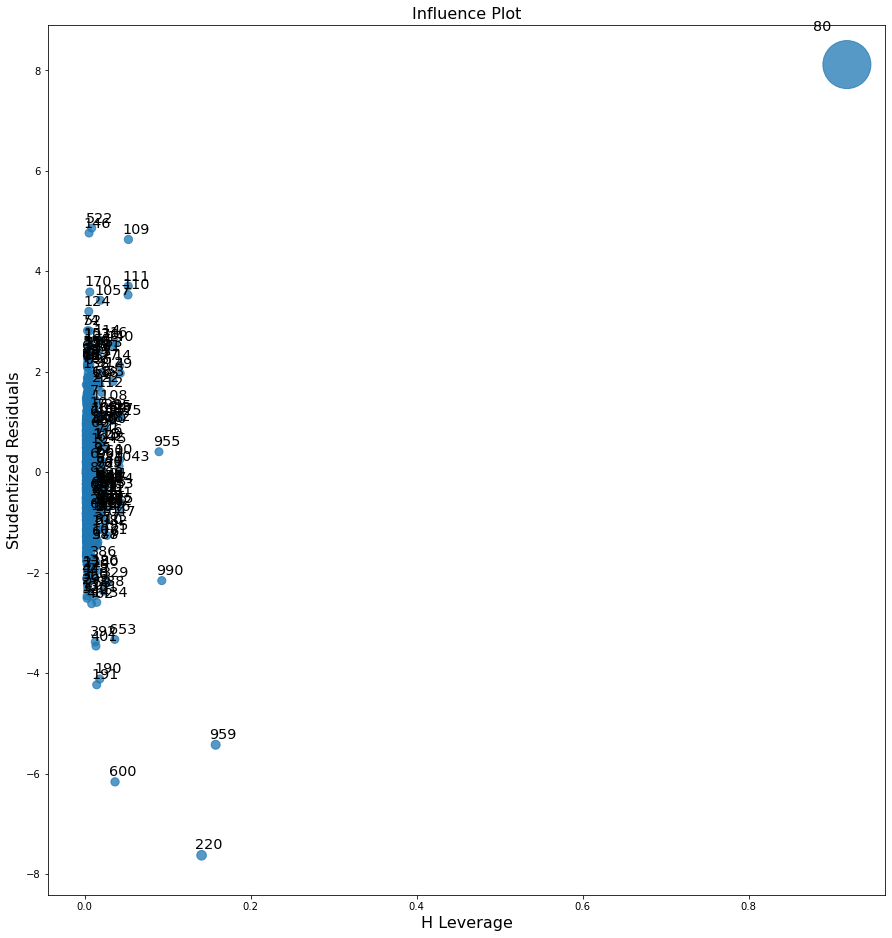

In [80]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(15,16))
fig=influence_plot(model,ax = ax)
plt.show()

In [81]:
k=toyo.shape[1]
n=toyo.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.025087108013937282

In [82]:
toyo[toyo.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
80,18950,25,20019,110,16000,5,5,100,1180,15906.167549,3043.832451


In [83]:
df = toyo.copy()
df

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [84]:
df1 = df.drop(df.index[[80]],axis=0).reset_index(drop =True)
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [85]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df1
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [87]:
if np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df1
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [88]:
final_model.rsquared

0.8882395145171204

In [89]:
new_data=pd.DataFrame({'Age':10,"KM":45000,"HP":90,"CC":1100,"Doors":4,"Gears":5,"QT":79,"Weight":1500},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,10,45000,90,1100,4,5,79,1500


In [90]:
final_model.predict(new_data)

0    31269.319492
dtype: float64

In [91]:
pred_y=final_model.predict(df1)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

In [92]:
d_fin={'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared, final_model.rsquared]}
table=pd.DataFrame(d_fin)
table

,Prep_Models,Rsquared
0,Model,0.883968
1,Final_Model,0.888240


In [93]:
y =toyo[["Price"]]
x = toyo[["Age","KM","HP","CC","Doors","Gears","QT","Weight"]]

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [96]:
y_pred = model.predict(x)
print(y_pred)

[[16791.95887083]
 [16253.80041357]
 [16779.63521013]
 ...
 [ 8455.43440191]
 [ 8579.22204117]
 [10396.0875261 ]]


In [97]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)
                                                    
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1148, 8), (1148, 1), (287, 8), (287, 1))

In [99]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=0.01)

ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)

ridgeR.fit(x_train, y_train)

mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 




Price    1.625036e+06
dtype: float64


In [100]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

ValueError: Data must be 1-dimensional

In [101]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

ValueError: Could not interpret input 'Coefficient Estimate'